#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 05
**CH05A What Likelihood of Loss to Expect on a Stock Portfolio?**

using the netflix dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [2]:
netflix = pd.read_csv("/workspaces/codespaces-jupyter/data/Netflix_Data.csv")
netflix
# Date: 
# The trading day for the stock quote. Format: MM/DD/YYYY.
# Close/Last: 
# The final price at which the stock traded on that day (also called the “closing price”).
# Volume: 
# The total number of shares traded during that day. It reflects trading activity and investor interest.
# Open: 
# The price at which the stock first traded when the market opened on that day.
# High: 
# The highest price the stock reached during that trading day.
# Low: 
# The lowest price the stock reached during that trading day.


,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume
0,0,2010-01-04 00:00:00+00:00,7.640000,7.640000,7.961429,7.565714,7.931429,17239600
1,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100
2,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400
3,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400
4,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900
...,...,...,...,...,...,...,...,...
3730,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400
3731,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000
3732,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700
3733,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800


In [3]:
#return 
netflix["return"] = (netflix["Close"]-netflix["Open"])/netflix["Open"]
netflix

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return
0,0,2010-01-04 00:00:00+00:00,7.640000,7.640000,7.961429,7.565714,7.931429,17239600,-0.036744
1,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100,-0.038454
2,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400,0.034737
3,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400,-0.031781
4,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900,0.015432
...,...,...,...,...,...,...,...,...,...
3730,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400,0.011063
3731,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000,-0.005725
3732,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700,0.002785
3733,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800,0.003477


Create percent return

In [4]:
# Fractional change between the current and a prior element. Examples below
netflix["pct_return"] = netflix["Close"].pct_change() * 100
# Count the number of NaN values in the 'fractional_change' column
netflix["pct_return"].isna().sum()

np.int64(1)

In [5]:
netflix[netflix["pct_return"].isna()]

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return
0,0,2010-01-04 00:00:00+00:00,7.64,7.64,7.961429,7.565714,7.931429,17239600,-0.036744,NaN


In [6]:
netflix= netflix.replace("", np.nan).replace("#N/A", np.nan).dropna().reset_index(drop=True)
netflix

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return
0,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100,-0.038454,-3.683623
1,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400,0.034737,3.513890
2,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400,-0.031781,-1.725439
3,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900,0.015432,1.717565
4,5,2010-01-11 00:00:00+00:00,7.604286,7.604286,7.704286,7.528571,7.660000,6783700,-0.007273,-0.131329
...,...,...,...,...,...,...,...,...,...,...
3729,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400,0.011063,1.377617
3730,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000,-0.005725,-0.750555
3731,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700,0.002785,0.303823
3732,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800,0.003477,0.009252


In [7]:
netflix[netflix["pct_return"].isna()]

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return


In [8]:
netflix['pct_return'].describe()

count    3734.000000
mean        0.173252
std         3.161094
min       -35.116603
25%        -1.240653
50%         0.037314
75%         1.526193
max        42.223510
Name: pct_return, dtype: float64

In [9]:
#Fractial change in action
s = pd.Series([90, 91, None, 85])
s.ffill().pct_change()

0         NaN
1    0.011111
2    0.000000
3   -0.065934
dtype: float64

Create date variables (we dont use these though)

In [10]:
netflix["Date"] = pd.to_datetime(netflix["Date"], format="mixed")
netflix["year"] = netflix["Date"].dt.year
netflix["month"] = netflix["Date"].dt.month
netflix["yearmonth"] = netflix["year"] * 100 + netflix["month"]

In [11]:
netflix

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return,year,month,yearmonth
0,1,2010-01-05 00:00:00+00:00,7.358571,7.358571,7.657143,7.258571,7.652857,23753100,-0.038454,-3.683623,2010,1,201001
1,2,2010-01-06 00:00:00+00:00,7.617143,7.617143,7.672857,7.197143,7.361429,23290400,0.034737,3.513890,2010,1,201001
2,3,2010-01-07 00:00:00+00:00,7.485714,7.485714,7.757143,7.462857,7.731429,9955400,-0.031781,-1.725439,2010,1,201001
3,4,2010-01-08 00:00:00+00:00,7.614286,7.614286,7.742857,7.465714,7.498571,8180900,0.015432,1.717565,2010,1,201001
4,5,2010-01-11 00:00:00+00:00,7.604286,7.604286,7.704286,7.528571,7.660000,6783700,-0.007273,-0.131329,2010,1,201001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,3730,2024-10-29 00:00:00+00:00,759.440002,759.440002,763.880005,748.010010,751.130005,3660400,0.011063,1.377617,2024,10,202410
3730,3731,2024-10-30 00:00:00+00:00,753.739990,753.739990,759.789978,752.280029,758.080017,1722000,-0.005725,-0.750555,2024,10,202410
3731,3732,2024-10-31 00:00:00+00:00,756.030029,756.030029,760.789978,752.229981,753.929993,3057700,0.002785,0.303823,2024,10,202410
3732,3733,2024-11-01 00:00:00+00:00,756.099976,756.099976,763.799988,747.770019,753.479981,2996800,0.003477,0.009252,2024,11,202411


### Figure 5.1 Histogram of daily returns in the entire data

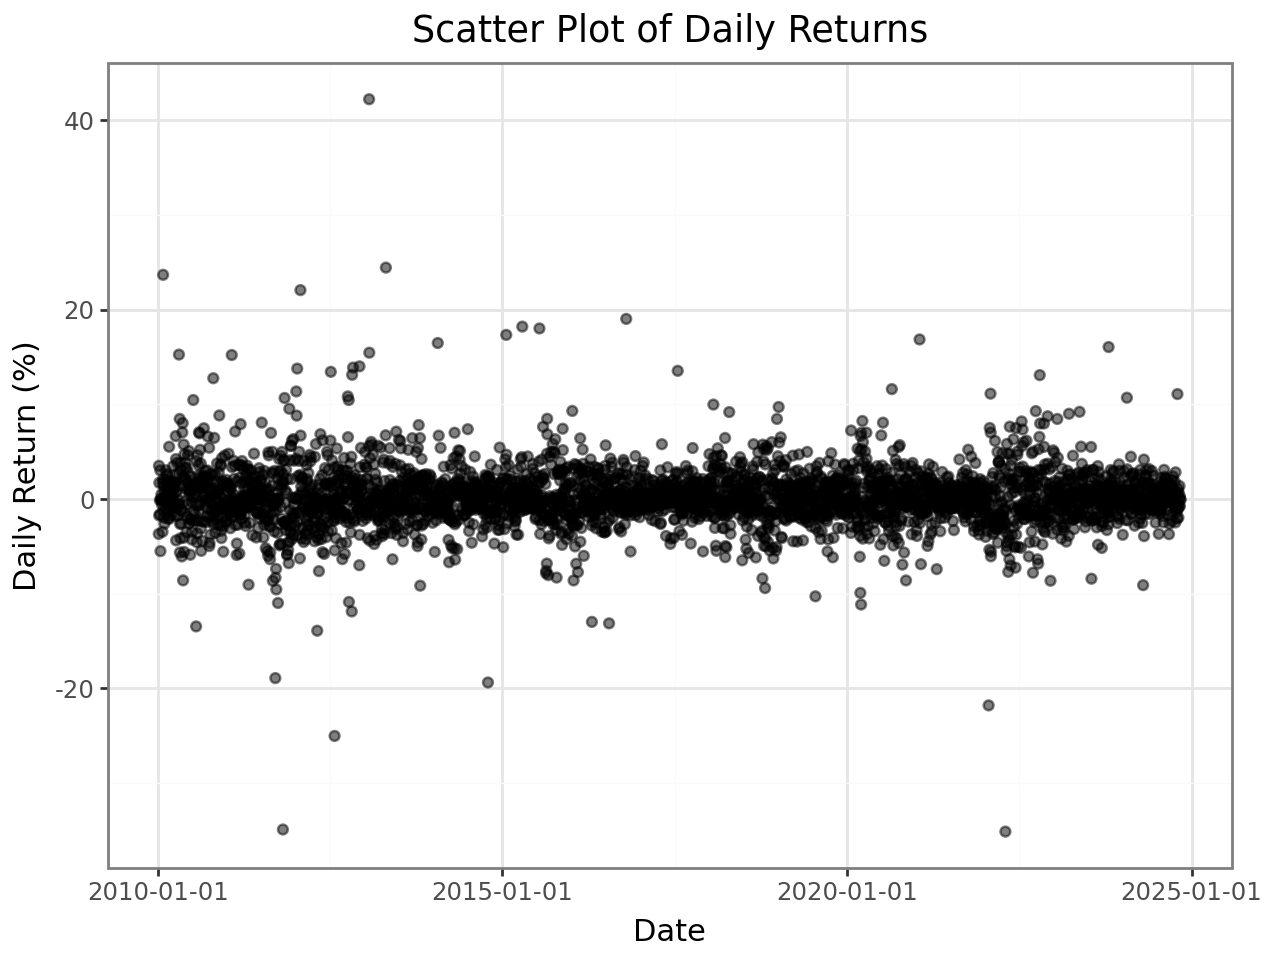

In [12]:
(
    ggplot(netflix, aes(x="Date", y="pct_return"))
    + geom_point(alpha=0.5)
    + labs(x="Date", y="Daily Return (%)", title="Scatter Plot of Daily Returns")
    + theme_bw()
)


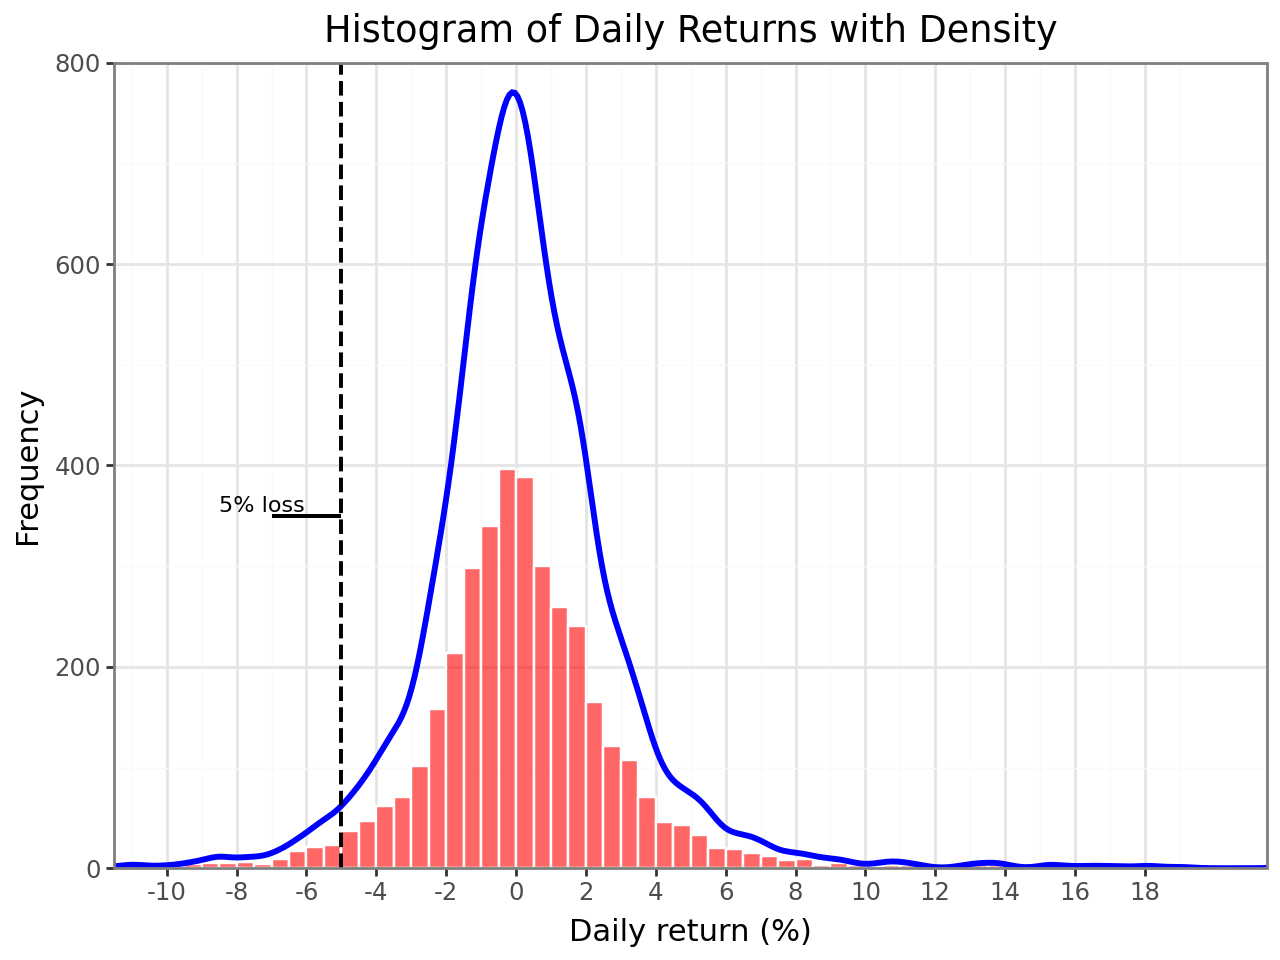

In [13]:
(
    ggplot(netflix, aes("pct_return"))
    + geom_histogram(
        binwidth=0.5, color="white", fill="red", boundary=0, closed="left", alpha=0.6
    )
    + geom_density(aes(y="..count.."), color="blue", size=1.2)
    + geom_vline(xintercept=-5, size=0.8, color="black", linetype="dashed")
    + labs(x="Daily return (%)", y="Frequency", title="Histogram of Daily Returns with Density")
    + coord_cartesian(xlim=[-10, 20], ylim=[0, 800])
    + scale_x_continuous(breaks=np.arange(-10, 20, 2))
    + scale_y_continuous(expand=[0, 0])
    + geom_segment(aes(x=-7, y=350, xend=-5, yend=350), arrow=None, color="black")
    + annotate("text", x=-8.5, y=360, label="5% loss", size=8, ha='left')
    + theme_bw()
)


In [14]:
netflix["pct_return"].describe()

count    3734.000000
mean        0.173252
std         3.161094
min       -35.116603
25%        -1.240653
50%         0.037314
75%         1.526193
max        42.223510
Name: pct_return, dtype: float64

In [15]:
netflix["return"].describe()

count    3734.000000
mean        0.000886
std         0.023658
min        -0.168420
25%        -0.012065
50%        -0.000308
75%         0.013139
max         0.193194
Name: return, dtype: float64

In [16]:
netflix["return"].median()

np.float64(-0.00030839813836341045)

In [17]:
netflix["return"].median()-netflix["return"].mean()

np.float64(-0.001194212713091981)

In [18]:
netflixmax=netflix.loc[netflix["pct_return"].idxmax()]
netflixmax

Unnamed: 0                          769
Date          2013-01-24 00:00:00+00:00
Adj_Close                         20.98
Close                             20.98
High                          21.309999
Low                           19.945715
Open                              20.57
Volume                        118805400
return                         0.019932
pct_return                     42.22351
year                               2013
month                                 1
yearmonth                        201301
Name: 768, dtype: object

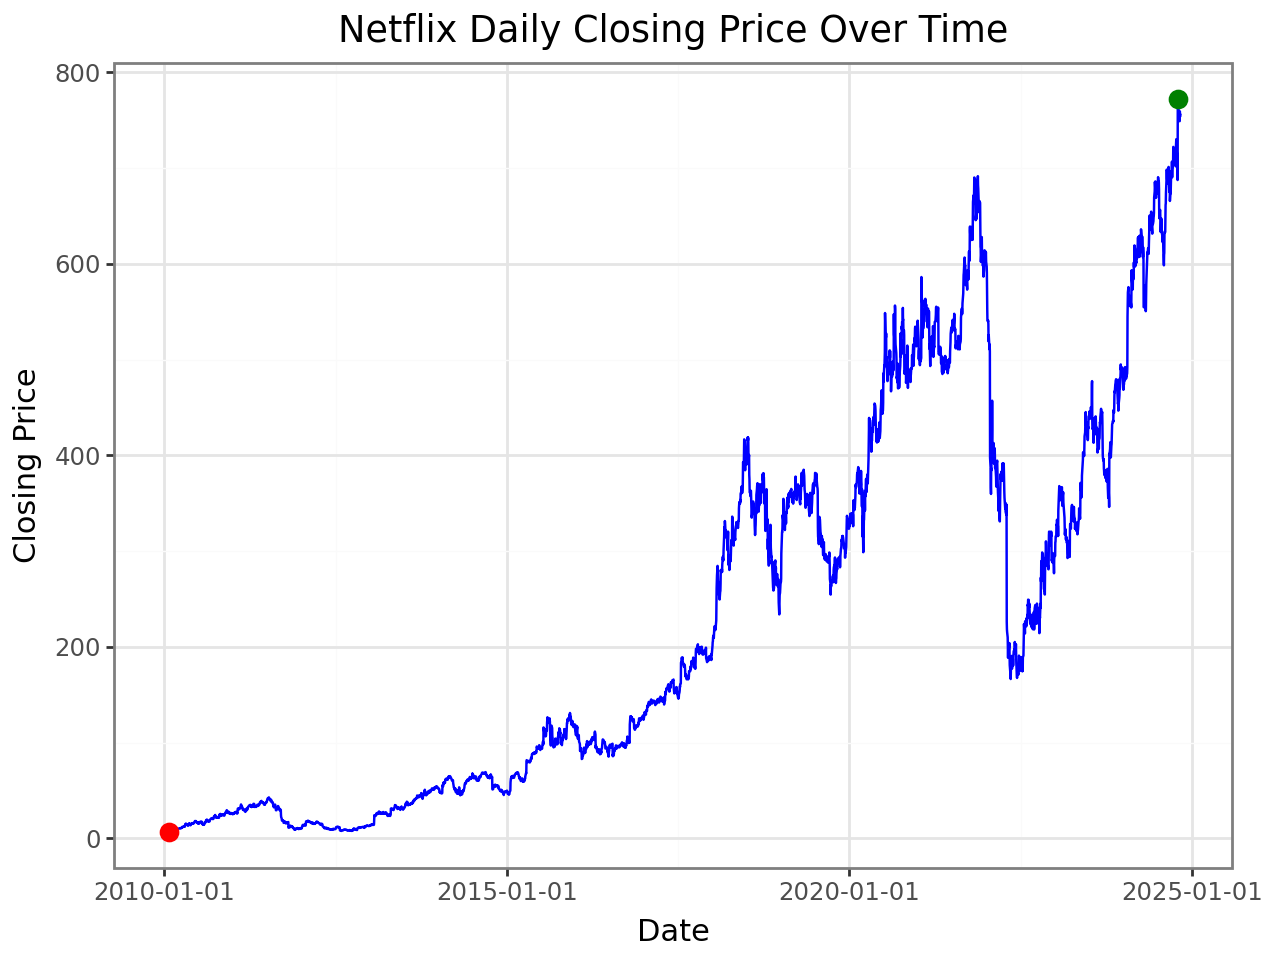

In [19]:
(
    ggplot(netflix, aes(x="Date", y="Close"))
    + geom_line(color="blue")
    + geom_point(
        data=netflix.loc[[netflix["Close"].idxmax()]],
        mapping=aes(x="Date", y="Close"),
        color="green",
        size=3
    )
    + geom_point(
        data=netflix.loc[[netflix["Close"].idxmin()]],
        mapping=aes(x="Date", y="Close"),
        color="red",
        size=3
    )
    + labs(x="Date", y="Closing Price", title="Netflix Daily Closing Price Over Time")
    + theme_bw()
)

In [20]:
netflix.count()
netflix
netflixless5 = netflix.loc[netflix["pct_return"] < -5].reset_index(drop=True)
netflixless5["pct_return_decimal"] = netflixless5["pct_return"] / 100
netflixless5

,Unnamed: 0,Date,Adj_Close,Close,High,Low,Open,Volume,return,pct_return,year,month,yearmonth,pct_return_decimal
0,8,2010-01-14 00:00:00+00:00,7.284286,7.284286,7.575714,7.270000,7.518571,17685500,-0.031161,-5.504067,2010,1,201001,-0.055041
1,78,2010-04-27 00:00:00+00:00,14.581429,14.581429,15.151429,14.518571,15.010000,34263600,-0.028552,-5.639271,2010,4,201004,-0.056393
2,86,2010-05-07 00:00:00+00:00,13.012857,13.012857,14.285714,12.918571,13.857143,25908400,-0.060928,-6.063725,2010,5,201005,-0.060637
3,91,2010-05-14 00:00:00+00:00,14.365714,14.365714,15.138571,14.290000,15.071429,34964300,-0.046825,-8.590130,2010,5,201005,-0.085901
4,95,2010-05-20 00:00:00+00:00,13.570000,13.570000,13.995714,13.284286,13.821429,28922600,-0.018191,-5.585928,2010,5,201005,-0.055859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3215,2022-10-11 00:00:00+00:00,214.289993,214.289993,230.440002,213.699997,226.050003,15282400,-0.052024,-6.822334,2022,10,202210,-0.068223
107,3261,2022-12-15 00:00:00+00:00,290.410004,290.410004,303.390015,286.549988,302.119995,17724600,-0.038759,-8.627249,2022,12,202212,-0.086272
108,3408,2023-07-20 00:00:00+00:00,437.420013,437.420013,448.500000,432.000000,447.000000,23989700,-0.021432,-8.410977,2023,7,202307,-0.084110
109,3446,2023-09-13 00:00:00+00:00,412.239990,412.239990,438.399994,410.690002,435.500000,11843000,-0.053410,-5.164603,2023,9,202309,-0.051646


In [21]:
netflix['Date'].min(), netflix['Date'].max()

(Timestamp('2010-01-05 00:00:00+0000', tz='UTC'),
 Timestamp('2024-11-04 00:00:00+0000', tz='UTC'))

In [22]:
netflix["pct_return"].mean()

np.float64(0.17325186938449477)

In [23]:
true_share = (netflix["pct_return"] <= -5).mean()
print(true_share)

0.029726834493840386


### Figure 5.2 prep

 Create 10 000 samples, with 500 and 1000 observations in each sample, taken from netflix["pct_return"]

In every sample: for each observation, check if it is a loss of 5% or more. Then calculate the percentage of observations out of 500 or 1000 where the loss exceeds 5%. 

In [24]:
n_samples = 10000  # Define the number of samples

# For n=1000
samples_1000 = np.random.choice(netflix["pct_return"].dropna(), size=(n_samples, 1000), replace=True)
a=samples_1000 < -5

nobs_1000 = np.mean(samples_1000 < -5, axis=1)

# For n=500
samples_500 = np.random.choice(netflix["pct_return"].dropna(), size=(n_samples, 500), replace=True)
nobs_500 = np.mean(samples_500 < -5, axis=1)


In [25]:
a = pd.DataFrame(a)
a

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9997,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
nobs_df = pd.DataFrame({"nobs_500": nobs_500, "nobs_1000": nobs_1000})*100

In [27]:
a = pd.DataFrame(samples_1000).T
a

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.516053,-2.628654,0.736103,1.896701,-2.928530,-3.691058,0.049742,1.457544,-2.440046,-2.288504,...,4.745781,0.661155,-1.219122,-0.133332,-1.009059,-0.262192,-1.810888,-2.657941,-1.153589,4.140024
1,-2.653879,-0.597818,0.728156,-0.380309,1.655934,0.099072,3.175865,-0.379143,3.357145,-1.123690,...,-2.374221,4.608033,-2.245899,-0.211923,-1.339078,1.837516,0.322947,1.717565,-1.282706,-1.257362
2,-0.199322,4.987442,1.466482,-0.438295,-2.595845,-0.879178,2.510838,5.526122,1.216938,1.116535,...,0.388309,-3.320998,2.017593,-1.483200,-1.026989,0.980850,0.893922,4.183784,-0.325753,0.232377
3,-3.304791,1.527727,-1.038642,-1.135110,-2.498744,-3.280291,-3.402432,-0.720921,3.522908,-2.361921,...,-2.735660,-0.563753,11.130198,3.737772,-1.729125,0.132101,-2.070515,-0.888312,1.182421,1.751580
4,-2.238985,-0.649672,1.387599,1.091652,0.288158,0.965876,-3.997294,2.927676,-1.044988,-18.906615,...,0.615238,0.031747,0.287698,0.099072,-0.586052,0.216302,3.256553,-6.048606,-0.459278,42.223510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.653160,2.020677,0.302534,2.472120,-0.599427,-1.824528,2.034973,1.463494,-0.808672,3.070606,...,-0.808672,-2.751761,1.111688,1.329296,-2.770231,1.642788,-2.201346,-0.096920,-1.722497,-6.092639
996,-1.274540,1.177329,-0.730525,4.178580,1.884641,2.080189,-1.164134,-1.077361,2.800740,-0.217731,...,-3.577372,-1.048666,1.125931,9.978905,-1.361404,0.357836,-1.382357,0.107442,3.399211,-4.154026
997,0.078235,4.669121,2.255820,-1.653240,0.761835,4.030426,0.106665,2.853656,-2.679073,3.139773,...,-0.038150,7.013379,1.981923,1.388142,-6.048606,1.523242,-0.066761,2.210883,-0.126256,2.708869
998,0.256183,-0.334783,1.887874,-2.894572,0.766601,0.597772,-2.168120,2.034973,-0.834412,22.064393,...,-0.325296,-10.867786,2.020677,-0.168850,6.443778,5.394726,-2.780670,2.905823,0.736579,-2.448309


In [28]:
nobs_df

,nobs_500,nobs_1000
0,2.2,2.5
1,3.2,2.2
2,4.8,2.3
3,2.6,1.5
4,3.0,3.2
...,...,...
9995,2.6,3.5
9996,2.6,3.0
9997,2.6,2.8
9998,2.8,3.3


In [29]:
error = (
    norm.ppf(0.975) * np.std(nobs_df["nobs_1000"]) / np.sqrt(len(nobs_df["nobs_1000"]))
)
left = np.mean(nobs_df["nobs_1000"]) - error
right = np.mean(nobs_df["nobs_1000"]) + error


In [73]:
left

np.float64(2.9515845766009696)

In [74]:
right

np.float64(2.9726754233990307)

### Figure 5.2

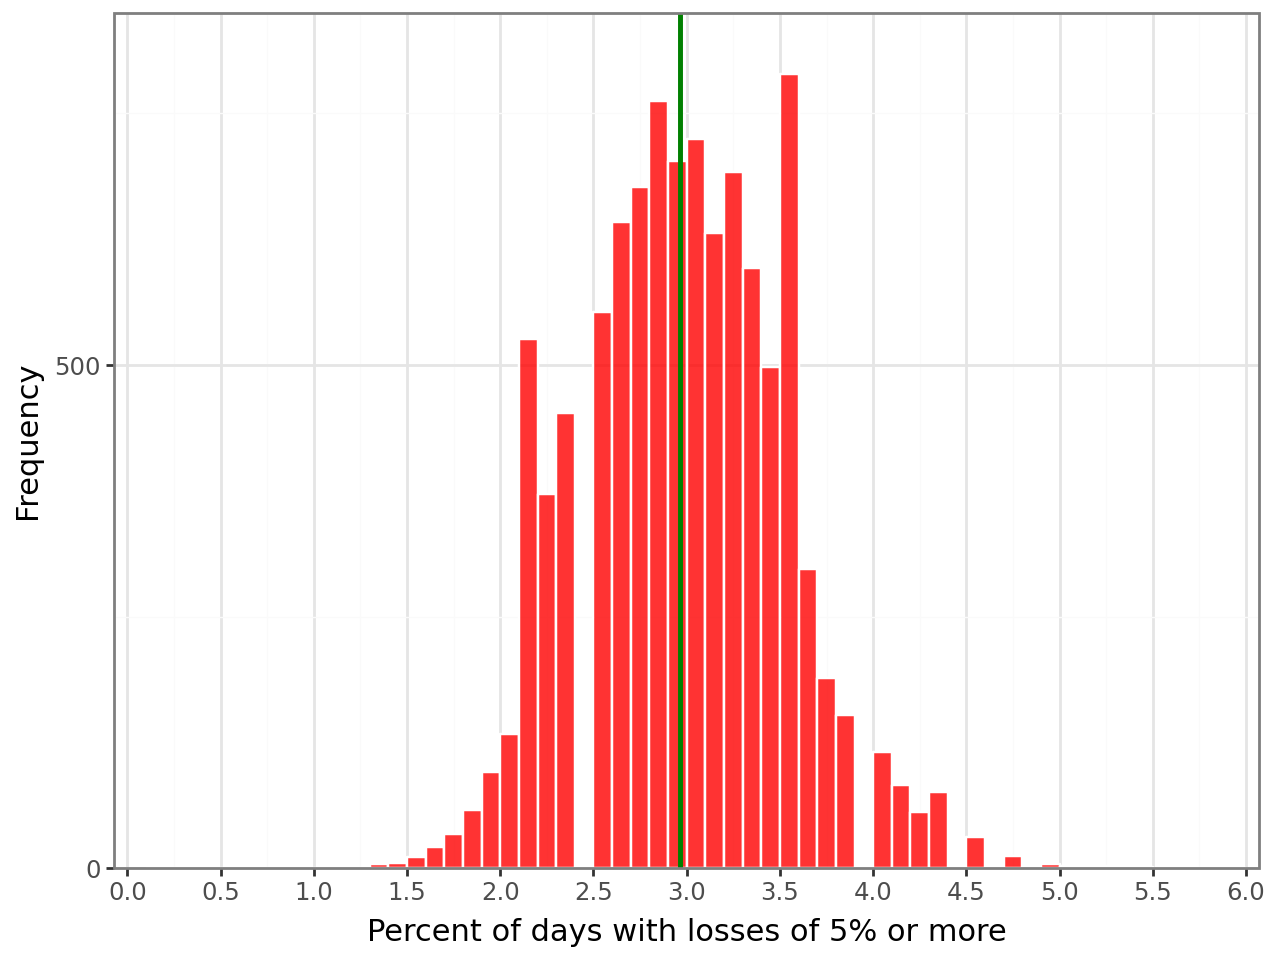

In [72]:
(
    ggplot(nobs_df, aes("nobs_1000"))
    + geom_histogram(
        binwidth=0.1,
        color="white",
        fill="red",
        alpha=0.8,
        center=0.75,
        closed="left",
    )
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + geom_vline(aes(xintercept=nobs_df["nobs_1000"].mean()), color="green", size=1)
    + coord_cartesian(xlim=[0, 6], ylim=(0, 850))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 6), breaks=np.arange(0, 6.5, 0.5))
    + scale_y_continuous(
        expand=(0.00, 0.00), limits=(0, 850), breaks=np.arange(0, 2500, 500)
    )
    + geom_segment(aes(x=0.8, y=2000, xend=0.52, yend=2000))
    + annotate("text", x=0.9, y=2000, label="Mean", size=12)
    + theme_bw()
)

In [31]:
nobs_df["nobs_1000"].std()

np.float64(0.5380685968178112)

In [32]:
nobs_df["nobs_500"].std()

np.float64(0.7649439218141105)

In [33]:
nobs_df["nobs_1000"].mean()

np.float64(2.96213)

In [34]:
nobs_df["nobs_500"].mean()

np.float64(2.9734800000000003)

### Figure 5.3 

Not working with epanechnikov kernel

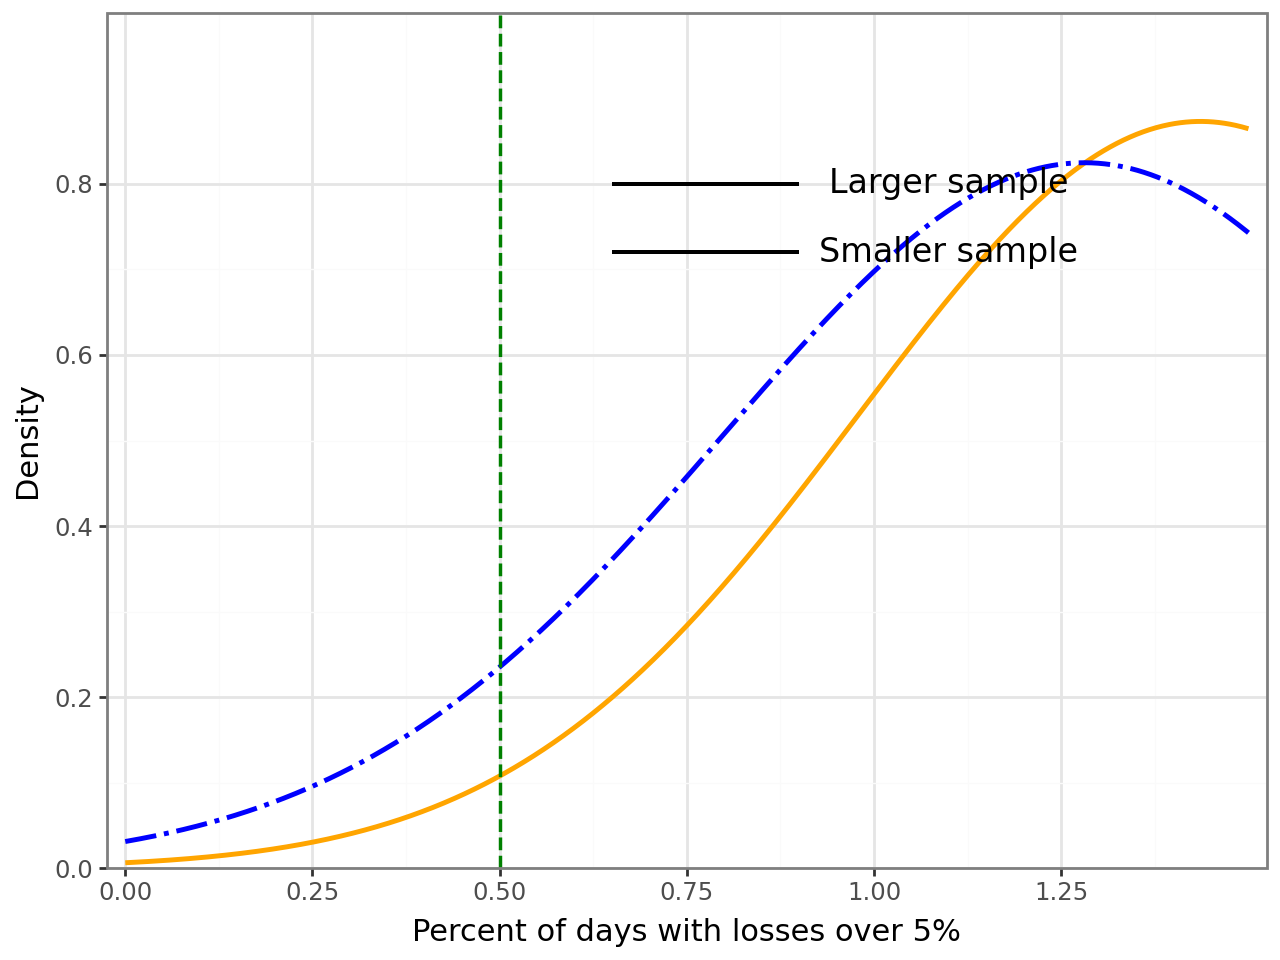

In [35]:
(
    ggplot(nobs_df)
    + stat_density(aes(x="nobs_1000"), color="orange", geom="line", bw=0.45, size=1)
    + stat_density(
        aes("nobs_500"),
        color="blue",
        geom="line",
        bw=0.45,
        linetype="dashdot",
        size=1,
    )
    + labs(x="Percent of days with losses over 5%", y="Density")
    + geom_vline(xintercept=0.5, color="green", size=0.7, linetype="dashed")
    + geom_segment(aes(x=0.9, y=0.8, xend=0.65, yend=0.8), size=0.5)
    + annotate("text", x=1.1, y=0.8, label="Larger sample", size=12)
    + geom_segment(aes(x=0.9, y=0.72, xend=0.65, yend=0.72), size=0.5)
    + annotate("text", x=1.1, y=0.72, label="Smaller sample", size=12)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 1.5), breaks=np.arange(0, 1.5, 0.25))
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 1), breaks=np.arange(0, 1, 0.2))
    + theme_bw()
    + theme(
        legend_position="none",
    )
)

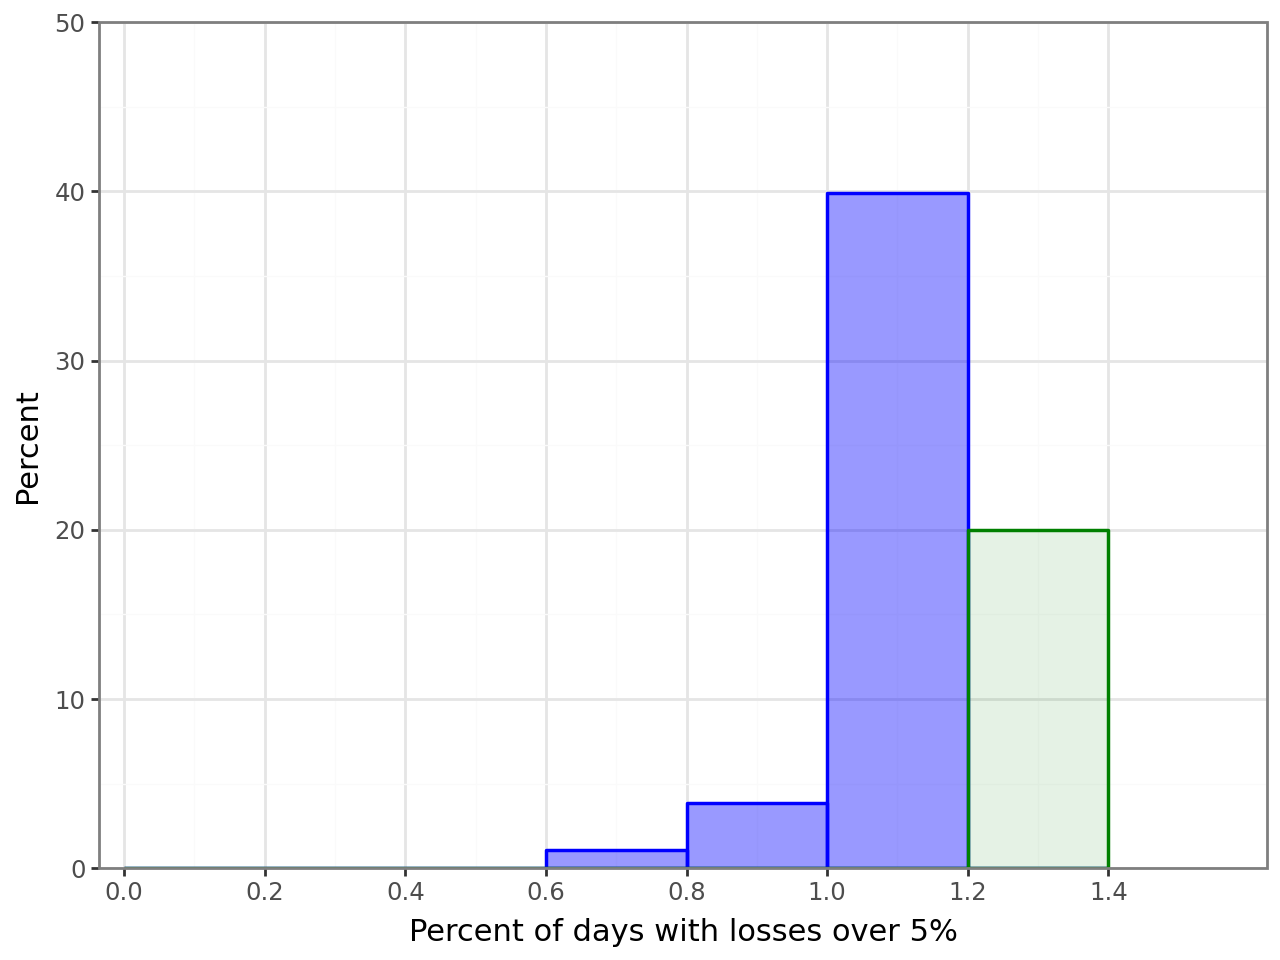

In [36]:
(
    ggplot(nobs_df)
    + geom_histogram(
        aes(x="nobs_500", y="stat(count)/sum(stat(count))*100"),
        color="blue",
        fill="blue",
        binwidth=0.2,
        center=0.5,
        size=0.7,
        alpha=0.4,
        closed="left",
    )
    + geom_histogram(
        aes(x="nobs_1000", y="stat(count)/sum(stat(count))*100"),
        color="green",
        fill="green",
        binwidth=0.2,
        center=0.5,
        alpha=0.1,
        size=0.7,
        closed="left",
    )
    + ylab("Percent")
    + xlab("Percent of days with losses over 5%")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(-0.01, 1.6), breaks=np.arange(0, 1.6, 0.2)
    )
    + scale_y_continuous(expand=(0.00, 0.00), limits=(0, 50))
    + scale_color_manual(
        labels=("N = 1000", "N = 500"), name="", values=("blue", "green")
    )
    + scale_alpha_identity()
    + scale_fill_identity()
    + theme_bw()
    + theme(
        legend_direction="horizontal",
    )
)


Create bootstrap samples

In [37]:
bootstrap_samples = np.random.choice(
    netflix["pct_return"].dropna(),
    size=(10000, len(netflix["pct_return"].dropna())),
    replace=True
)

In [38]:
pd.DataFrame(bootstrap_samples).T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-3.403756,1.149290,2.084257,2.469613,0.016033,-0.783546,-0.296508,7.907557,-2.550989,-2.013946,...,-0.870417,-19.369585,0.203453,1.422158,-0.544035,1.522581,2.634314,-1.267022,-1.176648,-3.402432
1,-4.599037,-0.750731,-0.840535,-2.346413,2.173057,1.119633,1.521384,-0.316731,0.517089,-0.071831,...,-0.419169,-3.180078,-1.293192,0.405506,-1.068832,5.091060,-1.530432,-1.472453,2.071346,1.263770
2,2.839587,1.151556,0.143434,1.253149,0.373892,1.088403,-0.584315,-0.017657,-3.897847,0.500886,...,-0.563599,0.501780,2.375794,0.795394,1.253149,-0.558132,2.878331,-3.711409,1.725714,-0.146647
3,2.428758,-1.200129,2.723420,2.854870,-1.382357,-2.335236,1.838791,-4.164891,0.030555,-1.123690,...,-0.360627,-2.716060,2.533312,-1.032993,3.404518,2.595536,-1.760979,-0.189096,0.858775,-1.016859
4,-3.676914,-0.770487,5.214224,3.390121,-0.436016,-0.586348,-5.639271,0.743150,2.676877,-1.352588,...,-0.475022,-4.493412,-8.307239,0.365854,-1.293192,15.456897,1.497630,2.868448,-1.165921,-2.273831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,-3.902515,-5.564401,1.563390,1.278331,-2.887445,0.493005,2.746043,6.002523,-1.458282,1.831340,...,0.204560,2.651792,-0.068366,-2.511165,0.282935,0.350904,3.399211,3.842034,0.000000,-0.740388
3730,1.547135,-0.146647,4.608033,-0.019162,1.133782,0.047600,-8.592851,0.459212,0.465473,2.854870,...,0.699484,0.279869,-1.824528,-4.593012,-0.820668,-2.910774,0.093730,0.114787,-6.522692,-0.586348
3731,-2.213947,-2.472226,0.732379,0.579685,1.547135,-0.561425,6.031554,1.006242,-0.165234,3.079819,...,-0.886207,-2.910862,-1.389540,-3.170874,-0.512133,2.060780,3.221900,1.724446,1.343633,-1.272816
3732,0.135607,3.421084,-0.118053,0.469388,-2.565369,0.517089,1.742528,0.209545,0.758528,0.913087,...,-8.592851,-3.785338,2.630443,0.962465,0.671944,-0.397413,-0.501957,0.303823,2.120313,-1.530017


Calculate percent of days wit losses over  thresholds from -1 to 10

In [69]:
bootstrap_loss_results = pd.DataFrame(
    [
        np.mean(bootstrap_samples < -1 * pct_loss, axis=1) * 100
        for pct_loss in range(1, 37)
    ],
    index=[f"loss{i}" for i in range(1, 37)],
).T

In [70]:
bootstrap_loss_results

,loss1,loss2,loss3,loss4,loss5,loss6,loss7,loss8,loss9,loss10,...,loss27,loss28,loss29,loss30,loss31,loss32,loss33,loss34,loss35,loss36
0,28.950187,15.425817,8.677022,4.820568,2.624531,1.687199,1.071237,0.776647,0.562400,0.374933,...,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.0
1,29.459025,15.640064,8.489555,5.329405,3.347616,2.062132,1.365828,0.964114,0.615961,0.294590,...,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.000000,0.0
2,28.976968,15.827531,8.623460,4.793787,2.865560,1.633637,1.017675,0.776647,0.482057,0.374933,...,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.0
3,29.726834,15.827531,9.051955,5.115158,2.999464,1.981789,1.178361,0.830209,0.535619,0.428495,...,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.000000,0.0
4,29.700054,15.720407,8.489555,4.900911,2.651312,1.633637,0.964114,0.696304,0.482057,0.401714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30.503482,15.907874,9.239422,5.463310,3.294055,1.981789,1.392608,1.205142,0.696304,0.535619,...,0.080343,0.080343,0.080343,0.080343,0.080343,0.080343,0.080343,0.080343,0.026781,0.0
9996,29.137654,16.256026,9.105517,5.436529,3.347616,2.035351,1.205142,0.937333,0.669523,0.374933,...,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.000000,0.0
9997,31.065881,16.389930,9.025174,5.543653,3.053026,2.035351,1.178361,0.910552,0.642742,0.508838,...,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.053562,0.026781,0.0
9998,29.137654,15.077665,8.462775,5.356186,3.240493,1.955008,1.258704,1.017675,0.642742,0.401714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [71]:
bootstrap_loss_results["loss5"].describe()

count    10000.000000
mean         2.970986
std          0.277910
min          2.008570
25%          2.785217
50%          2.972683
75%          3.160150
max          4.043921
Name: loss5, dtype: float64

Plot percent of days with losses over -5%

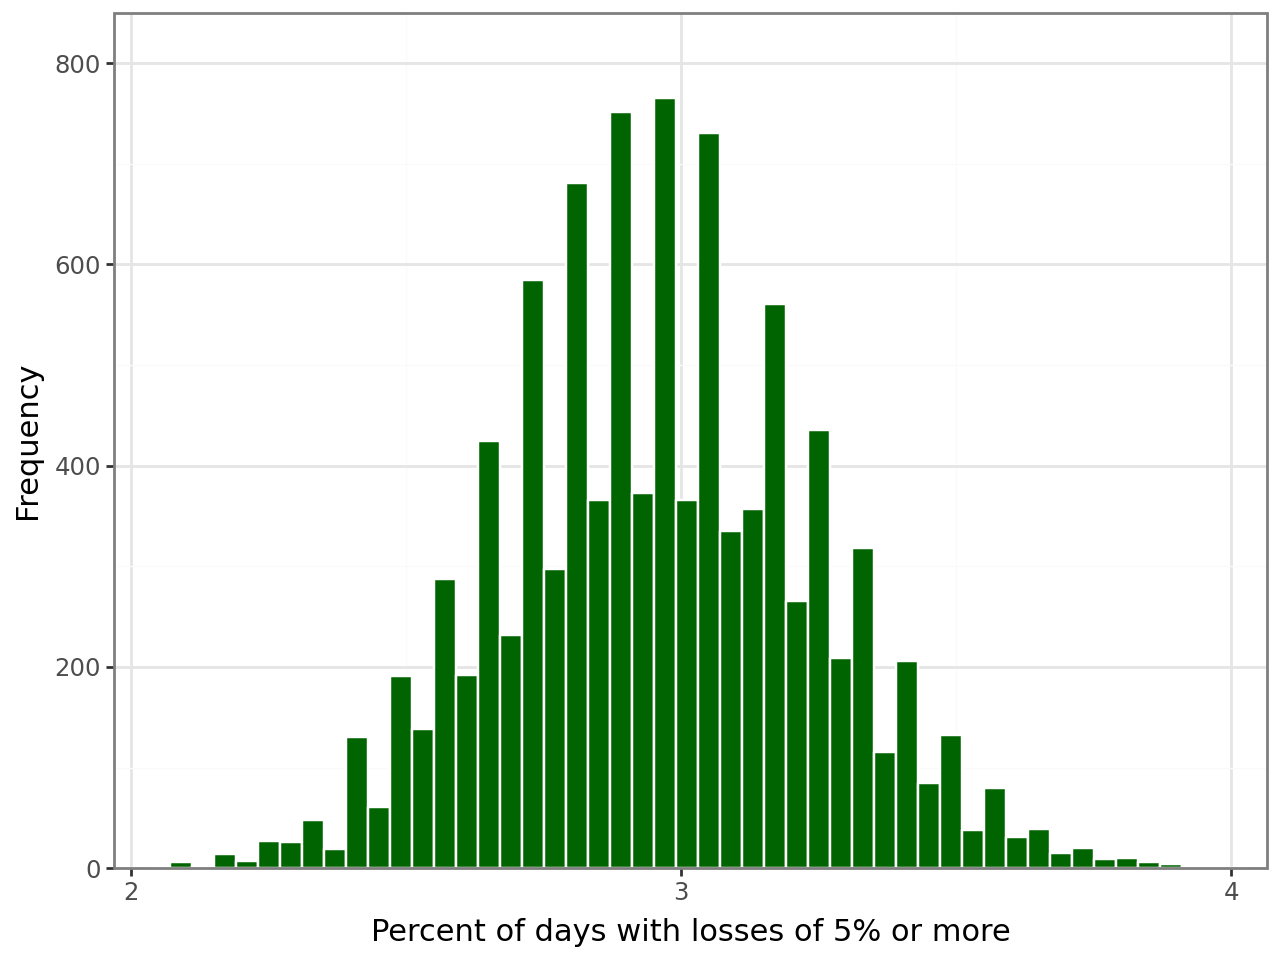

In [45]:
min_val = bootstrap_loss_results["loss5"].min()
max_val = bootstrap_loss_results["loss5"].max()

(
    ggplot(bootstrap_loss_results, aes("loss5"))
    + geom_histogram(
        fill="darkgreen", color="white", binwidth=0.04, boundary=0, closed="left"
    )
    + scale_y_continuous(expand=(0, 0), limits=(0, 850), breaks=np.arange(0, 1200, 200))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(min_val, max_val), breaks=np.arange(min_val,max_val, 1))
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + theme_bw()
)


In [47]:
bootstrap_loss_results["loss5"].std()

np.float64(0.2779101442409397)

In [48]:
mean_loss5 = bootstrap_loss_results["loss5"].mean()
se_bootstrap = bootstrap_loss_results["loss5"].std()
ci_lower_se = mean_loss5 - 2 * se_bootstrap
ci_upper_se = mean_loss5 + 2 * se_bootstrap

print(f"Approximate 95% CI using SE*2: [{ci_lower_se:.4f}, {ci_upper_se:.4f}]")

Approximate 95% CI using SE*2: [2.4152, 3.5268]


In [49]:
# Assuming bootstrap_loss_results["loss5"] is a Series of bootstrap results
ci_lower = bootstrap_loss_results["loss5"].quantile(0.025)
ci_upper = bootstrap_loss_results["loss5"].quantile(0.975)

print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


95% Confidence Interval: [2.4371, 3.5351]


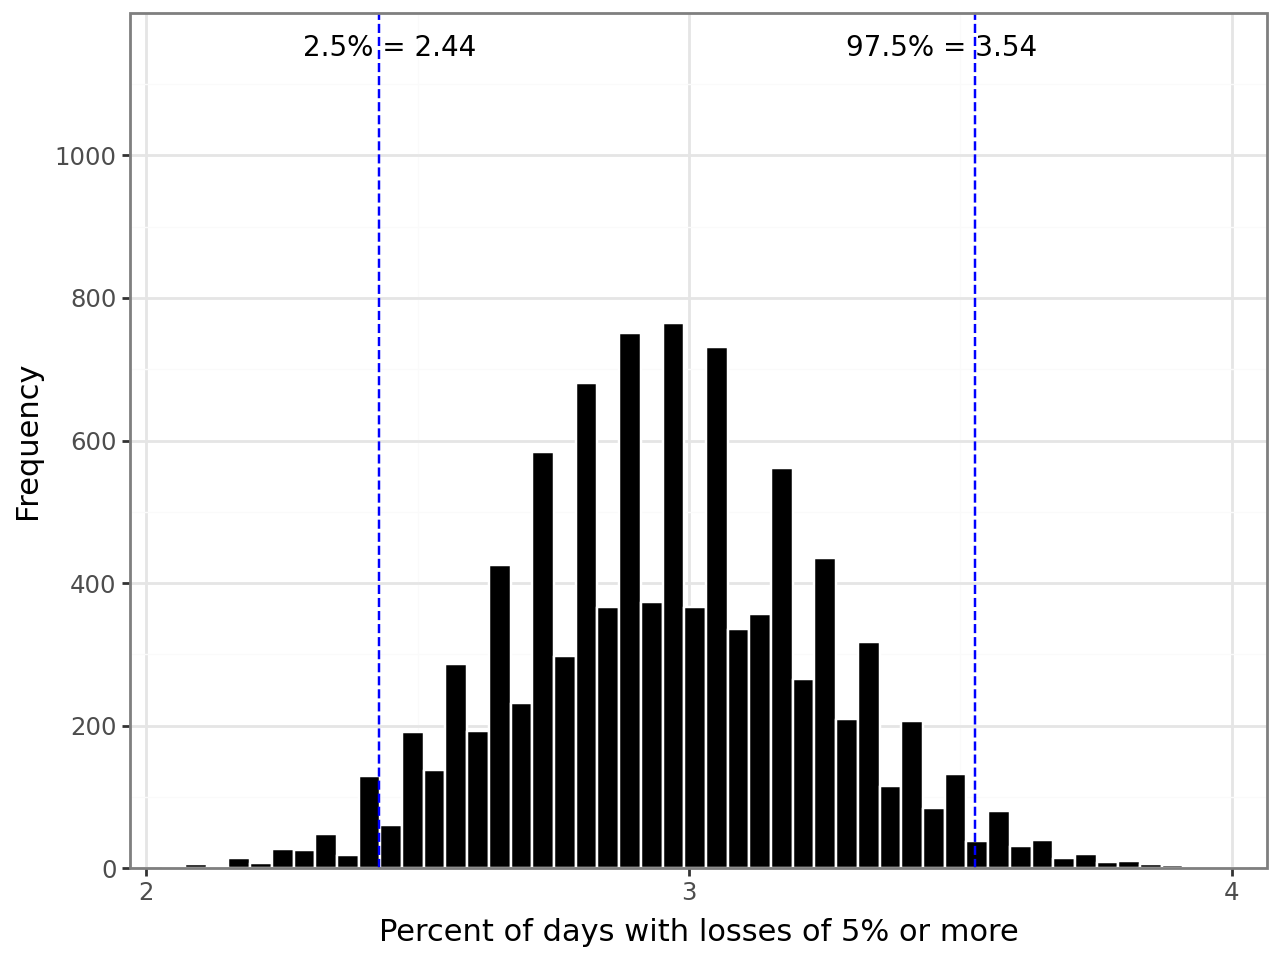

In [52]:
from plotnine import geom_vline, annotate

ci_lower = bootstrap_loss_results["loss5"].quantile(0.025)
ci_upper = bootstrap_loss_results["loss5"].quantile(0.975)

(
    ggplot(bootstrap_loss_results, aes("loss5"))
    + geom_histogram(
        fill="black", color="white", binwidth=0.04, boundary=0, closed="left"
    )
    + geom_vline(xintercept=ci_lower, color="blue", linetype="dashed")
    + geom_vline(xintercept=ci_upper, color="blue", linetype="dashed")
    + annotate("text", x=ci_lower + 0.02, y=1150, label=f"2.5% = {ci_lower:.2f}", size=10)
    + annotate("text", x=ci_upper - 0.06, y=1150, label=f"97.5% = {ci_upper:.2f}", size=10)
    + scale_y_continuous(expand=(0, 0), limits=(0, 1200), breaks=np.arange(0, 1200, 200))
    + scale_x_continuous(expand=(0.01, 0.01), limits=(min_val, max_val), breaks=np.arange(min_val,max_val, 1))
    + labs(x="Percent of days with losses of 5% or more", y="Frequency")
    + theme_bw()
)


## Standard Error

In [53]:
netflix.count()

Unnamed: 0    3734
Date          3734
Adj_Close     3734
Close         3734
High          3734
Low           3734
Open          3734
Volume        3734
return        3734
pct_return    3734
year          3734
month         3734
yearmonth     3734
dtype: int64

In [54]:
ncov = round(1 / np.sqrt(netflix.count()),2)
ncov

Unnamed: 0    0.02
Date          0.02
Adj_Close     0.02
Close         0.02
High          0.02
Low           0.02
Open          0.02
Volume        0.02
return        0.02
pct_return    0.02
year          0.02
month         0.02
yearmonth     0.02
dtype: float64

In [75]:
# Calculate the indicator for loss > 5%
loss_indicator = (netflix["pct_return"] <= -5).dropna()
std_loss5 = loss_indicator.std(ddof=1)
print(f"Standard deviation of loss5 indicator: {std_loss5:.4f}")


Standard deviation of loss5 indicator: 0.1699


In [56]:
SE=std_loss5 *ncov
SE=SE*100
SE

Unnamed: 0    0.339711
Date          0.339711
Adj_Close     0.339711
Close         0.339711
High          0.339711
Low           0.339711
Open          0.339711
Volume        0.339711
return        0.339711
pct_return    0.339711
year          0.339711
month         0.339711
yearmonth     0.339711
dtype: float64

### Compare with we got from bootstrap

In [57]:
std_loss5 = bootstrap_loss_results["loss5"].std()
print(f"Standard deviation of fraction of 5%+ loss: {std_loss5}")

Standard deviation of fraction of 5%+ loss: 0.2779101442409397


### And just to calc a Confidence Interval for original dataset netflix

In [80]:
from scipy.stats import norm

mean_loss5_or = loss_indicator.mean()
std_loss5_or = loss_indicator.std(ddof=1)
n = loss_indicator.count()
se = std_loss5_or / np.sqrt(n)
z = norm.ppf(0.975)  # 1.96 for 95% CI

ci_lower =round((mean_loss5_or - z * se)*100,5)
ci_upper =round((mean_loss5_or + z * se)*100,5)

print(f"95% Confidence Interval: [{ci_lower:.5f}, {ci_upper:.5f}]")


95% Confidence Interval: [2.42788, 3.51749]


## Bootstrap with 900

In [81]:
#Create a boostrap samples
bootstrap_samples_9 = np.random.choice(
    netflix["pct_return"].dropna(),
    size=(900, len(netflix["pct_return"].dropna())),
    replace=True
)
pd.DataFrame(bootstrap_samples_9).T

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,-0.182758,-1.683623,1.070834,0.444938,-0.217909,0.000000,1.576392,-0.275142,-1.603400,1.149290,...,-1.484146,-2.256948,3.079819,-8.642349,-2.070259,-35.116603,-0.096826,1.150910,-3.491053,-4.493412
1,6.997057,4.235664,1.453469,3.483209,0.761835,2.737902,-3.652027,0.017229,2.239428,-1.022050,...,-5.043879,-0.487963,3.248951,0.426871,0.418903,-0.732045,-1.624729,-1.038642,0.560521,-2.253436
2,1.071821,-1.536268,1.431818,0.393163,-1.023110,0.336427,-0.070476,-0.274678,-0.788973,-0.843755,...,-4.732340,-1.293020,0.514374,1.100836,1.730032,-6.166120,-0.008982,1.244853,0.487204,-0.250401
3,-4.277044,0.430778,1.479890,-2.625650,-4.764341,-2.213947,-1.750549,0.583028,-1.237282,-0.597818,...,2.231875,0.079069,-1.603400,6.412127,-0.334390,0.360355,-3.691058,-0.051047,-0.096826,0.023347
4,-1.508452,-3.260001,-0.190474,-0.125902,5.388996,-0.220499,0.240679,-0.986549,-1.956193,-2.247616,...,-2.033647,0.858775,-0.096826,-3.278972,2.688383,1.669046,3.390121,0.634323,-0.720990,2.282205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,-3.756808,-0.437707,5.214224,1.654099,4.983674,0.771944,-3.147118,-1.685805,-0.274527,-0.071146,...,-0.907358,-0.354481,-1.352588,-4.493412,-1.372887,0.281633,1.088641,-0.882144,-3.320998,3.139773
3730,-0.405158,-4.258950,3.139773,0.846001,-1.141335,-0.972135,0.699484,-2.135063,6.997057,-1.905567,...,0.937780,-2.013946,-0.421097,0.430482,-1.047084,0.088170,-1.956085,-0.375167,2.980833,-1.461988
3731,1.596565,1.693544,2.327028,-0.362131,0.690149,2.634314,-1.588561,3.983427,-0.290303,-0.542780,...,-1.164134,-0.834363,42.223510,-0.403086,2.141249,-0.480504,-5.077314,3.417163,0.711254,-0.879831
3732,1.940064,-4.309025,-1.379144,-0.653335,0.249009,-0.403086,-0.413351,-0.653327,-6.153066,2.793983,...,-2.393169,-0.600992,4.242283,0.319349,3.864633,-0.839757,2.727553,-0.674784,-0.066761,-0.749555


In [86]:
#calc perc up to 36
bootstrap_loss_results_9 = pd.DataFrame(
    [
        np.mean(bootstrap_samples_9 < -1 * pct_loss, axis=1) * 100
        for pct_loss in range(1, 37)
    ],
    index=[f"loss{i}" for i in range(1, 37)],
).T

bootstrap_loss_results_9

,loss1,loss2,loss3,loss4,loss5,loss6,loss7,loss8,loss9,loss10,...,loss27,loss28,loss29,loss30,loss31,loss32,loss33,loss34,loss35,loss36
0,29.137654,15.720407,8.864488,5.115158,3.454740,2.222817,1.231923,1.071237,0.696304,0.535619,...,0.107124,0.107124,0.107124,0.107124,0.107124,0.107124,0.107124,0.107124,0.080343,0.0
1,29.592930,15.559721,8.462775,4.874130,2.865560,1.713980,0.937333,0.642742,0.428495,0.321371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,30.048206,15.479379,8.007499,4.311730,2.463846,1.392608,0.696304,0.562400,0.482057,0.321371,...,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.000000,0.0
3,29.807177,16.604178,9.132298,4.820568,2.704874,1.740761,1.044456,0.669523,0.374933,0.241028,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,29.753615,15.747188,8.382432,5.490091,3.374397,1.928227,1.339047,1.017675,0.723085,0.615961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,29.914301,16.497054,9.266202,5.597215,3.026245,1.499732,0.910552,0.669523,0.428495,0.321371,...,0.107124,0.107124,0.107124,0.107124,0.107124,0.107124,0.107124,0.107124,0.026781,0.0
896,30.396358,15.881093,8.677022,5.356186,3.079807,1.660418,0.937333,0.615961,0.401714,0.214247,...,0.133905,0.133905,0.133905,0.133905,0.133905,0.133905,0.133905,0.133905,0.133905,0.0
897,29.887520,15.907874,9.426888,5.249063,3.106588,1.713980,1.098018,0.856990,0.535619,0.321371,...,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.026781,0.000000,0.0
898,29.298340,15.747188,8.569898,4.847349,2.731655,1.794322,1.151580,0.964114,0.642742,0.428495,...,0.080343,0.080343,0.080343,0.080343,0.080343,0.080343,0.080343,0.080343,0.053562,0.0
